In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [ ]:
# Load dataset
framingham = pd.read_csv('/content/framingham.csv')
print('Data shape:', framingham.shape)
print(framingham.head())

Data shape: (4240, 16)
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0          

In [ ]:
# Check missing values
print('\nMissing values per column:')
print(framingham.isnull().sum())


Missing values per column:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Data Cleaning: Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
framingham_imputed = pd.DataFrame(imputer.fit_transform(framingham), columns=framingham.columns)


In [ ]:
# Verify no missing values remain
print('\nAfter imputation:')
print(framingham_imputed.isnull().sum().sum(), 'missing values remain')


After imputation:
0 missing values remain


In [ ]:
# Define features and target
X = framingham_imputed.drop('TenYearCHD', axis=1)
y = framingham_imputed['TenYearCHD']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print('\nLogistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_lr))


Logistic Regression Results:
Accuracy: 0.8466981132075472
ROC-AUC: 0.5246005944863551


In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('\nRandom Forest Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.8459119496855346
ROC-AUC: 0.5177553578202807


In [ ]:
# Model 3: Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print('\nGradient Boosting Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_gb))


Gradient Boosting Results:
Accuracy: 0.8459119496855346
ROC-AUC: 0.54328273636595


In [ ]:
# Model 4: Support Vector Machine
svm = SVC(probability=True, kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print('\nSVM Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_svm))



SVM Results:
Accuracy: 0.85062893081761
ROC-AUC: 0.5120265838163336


In [ ]:
# Model 5: Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(50, 20), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred_mlp = mlp.predict(X_test_scaled)

print('\nNeural Network Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_mlp))
print('ROC-AUC:', roc_auc_score(y_test, y_pred_mlp))



Neural Network Results:
Accuracy: 0.7838050314465409
ROC-AUC: 0.5534749600234337


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Compare all models
results = pd.DataFrame({
'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'Neural Network'],
'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_mlp)],
'ROC_AUC': [roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_rf), roc_auc_score(y_test, y_pred_gb), roc_auc_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_mlp)]
})

print('\nModel Comparison Summary:')
print(results)



Model Comparison Summary:
                 Model  Accuracy   ROC_AUC
0  Logistic Regression  0.846698  0.524601
1        Random Forest  0.845912  0.517755
2    Gradient Boosting  0.845912  0.543283
3                  SVM  0.850629  0.512027
4       Neural Network  0.783805  0.553475


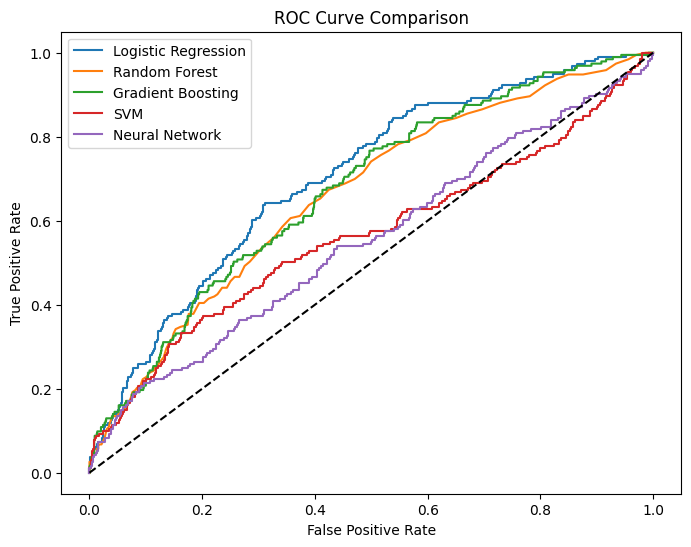

In [ ]:
# Plot ROC curves for comparison
plt.figure(figsize=(8, 6))
for name, model, X_t in [
    ('Logistic Regression', log_reg, X_test_scaled),
    ('Random Forest', rf, X_test),
    ('Gradient Boosting', gb, X_test),
    ('SVM', svm, X_test_scaled),
    ('Neural Network', mlp, X_test_scaled)
]:
    y_prob = model.predict_proba(X_t)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [ ]:
# Final summary output
print('\nFinal Evaluation Complete.')


Final Evaluation Complete.
